**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

In [71]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# this is for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#this is bag of words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#import data
# pd.read_csv('/content/IMDB Dataset.csv')

df = pd.read_csv('IMDB Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
df.review[4369]

"Working girl Kitty (Sothern) is engaged to Bill (Kelly), who neglects her by working long hours at his garage in order to save money for their marriage. After being stood up on her birthday, Kitty goes on a double-date/blind date, where she meets department store heir Bob Hartwell (Hamilton). She falls in love, but leaves him when his protestations of love appear to cover a desire for her to be his mistress, rather than his wife. Faithful Bill rallies 'round to comfort her, and at last she gives in to his repeated requests to reinstate their engagement, pressured in part by Bill's support of her family after she loses her job. When Bob returns, however, convinced that he wants marriage after all, will Kitty follow her heart or her conscience? <br /><br />This film was a lot better than I'd expected it to be. The character of Bill at first comes off as the sort of loud comic Irishman type that Jack Carson played so often. But Kelly (and the script) infuse the character with real compas

In [14]:
#the size of the dataset
df.shape

(50000, 2)

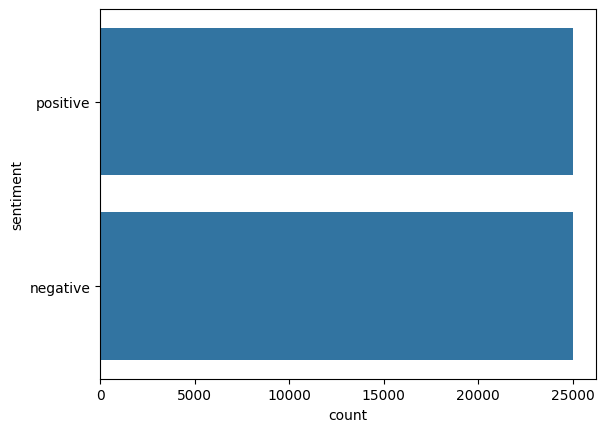

In [16]:
# checking the target
sns.countplot(df.sentiment);

In [18]:
df.sentiment.value_counts()

#The dataset is very balance

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [20]:
#dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [21]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [26]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [ ]:
# we will drop duplicates

In [27]:
#preprocessing step

In [29]:
#dropping duplicates
df = df.drop_duplicates()

In [30]:
#encoding the target
# df['review'] = df.review.replace({'positive':1, 'negative':0})

In [50]:
def preprocess(text):
  """
  This function preprocess the text input and
  return a process list output
  """

  # tokenize the text
  tokens = word_tokenize(text.lower())

  # remove stopword
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [w for w in tokens if not w in stop_words] #using a list comprehension

  #stemming
  # you may want to replace the 2lines of code with that of lemma
  stemmer = PorterStemmer()
  stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]

  #join the tokens back to a string
  return ' '.join(stemmed_tokens)

In [ ]:
# stop_words = set(stopwords.words('english'))

# filter_tokens = [w for w in tokens if not w in stop_words] #using a list comprehension

In [ ]:
# not_stop = []
# for i in tokens:
#   if not i in stop_words:
#     not_stop.append(i)

In [ ]:
# for stemming
# stemmer = PorterStemmer()
# stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]

#for lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmer = WordNetLemmatizer()
# lemmatised_tokens = [lemmer.lemmatize(w) for w in filtered_tokens]

In [ ]:
# stemmed_tokens = []
# for w in filtered_tokens:
#   stemmer.stem(w)

In [48]:
df.review.apply(preprocess)

0        [one, reviewers, mentioned, watching, 1, oz, e...
1        [wonderful, little, production, ., <, br, /, >...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, 's, family, little, boy, (, jake, ...
4        [petter, mattei, 's, ``, love, time, money, ''...
                               ...                        
49995    [thought, movie, right, good, job, ., n't, cre...
49996    [bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [catholic, taught, parochial, elementary, scho...
49998    ['m, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 49582, dtype: object

In [51]:
# applying the preprocessing to each review
df['processed_review'] = df.review.apply(preprocess)

<ipython-input-51-3bc63a59bdaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_review '] = df.review.apply(preprocess)


In [52]:
df

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod 'll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product . < br / > < br / > film ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy ( jake ) think 's zo...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job . n't creativ orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogu , bad act , idiot direc..."
49997,I am a Catholic taught in parochial elementary...,negative,"cathol taught parochi elementari school nun , ..."
49998,I'm going to have to disagree with the previou...,negative,'m go disagre previou comment side maltin one ...


In [55]:
#feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_review'])

In [56]:
X

<49582x80813 sparse matrix of type '<class 'numpy.float64'>'
	with 4759493 stored elements in Compressed Sparse Row format>

In [61]:
### This code is just explaining TF-IDF

# from sklearn.feature_extraction.text import TfidfVectorizer

# # Sample text data
# text_data = ["Natural language a processing enables computers to understand human language.",
#              "Machine learning is a fascinating field of study and enables AI."]

# # Initialize the TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Fit and transform the text data
# tfidf_matrix = vectorizer.fit_transform(text_data)

# # Convert the tfidf_matrix to an array and print the result
# tfidf_array = tfidf_matrix.toarray()
# # print(tfidf_array)

# # If you want to see the feature names (words) corresponding to each column in the matrix:
# feature_names = vectorizer.get_feature_names_out()
# # print(feature_names)

# # Optionally, create a DataFrame for better readability
# import pandas as pd
# tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)
# tfidf_df

,ai,and,computers,enables,fascinating,field,human,is,language,learning,machine,natural,of,processing,study,to,understand
0,0.000000,0.000000,0.308515,0.219511,0.000000,0.000000,0.308515,0.000000,0.61703,0.000000,0.000000,0.308515,0.000000,0.308515,0.000000,0.308515,0.308515
1,0.324336,0.324336,0.000000,0.230768,0.324336,0.324336,0.000000,0.324336,0.00000,0.324336,0.324336,0.000000,0.324336,0.000000,0.324336,0.000000,0.000000


In [62]:
#HURRAY we are done preprocessing

In [63]:
#selecting the target
y = df['sentiment']

In [65]:
#spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [67]:
#training the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [68]:
predictions = model.predict(X_test)

In [69]:
predictions

array(['negative', 'positive', 'positive', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [72]:
accuracy_score(y_test, predictions)

0.8606433397196733